<a href="https://colab.research.google.com/github/powersurge8891/Data-mining-with-Python/blob/main/Employees'_turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### getting data and libraries


Analysizing employees' turnover with Kaplan Meier

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis

/content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis


In [2]:
#importing library
import pandas as pd

In [5]:
dataset=pd.read_csv('turnover.csv', encoding='latin-1')

In [6]:
dataset.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


###Exploring Data

In [ ]:
'''
stag: experience(time)
event: employee turnover
traffic: From what pipelene employee came to the company. 
        You contacted the company directly (after learning from advertising, knowing the company's brand, etc.) 
coach: Presence of a coach (training) on probation
head_gender:head (supervisor) gender
greywage: Greywage in Russia or Ukraine means that the employer (company) pay just a 
          tiny bit amount of salary above the white-wage (white-wage means minimum
wayL Employee's way of transportation
extraversion: Extraversion score 
              (Extraversion indicates how outgoing and social a person is)
independent: Independend score
selfcontrol: Selfcontrol score
anxiety: Anxiety score
novator: novator score
'''

In [9]:
dataset.event.value_counts()

1    571
0    558
Name: event, dtype: int64

In [10]:
dataset.isna().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [14]:
data=pd.get_dummies(dataset)
data.head()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator,gender_f,gender_m,industry_ HoReCa,industry_Agriculture,industry_Banks,industry_Building,industry_Consult,industry_IT,industry_Mining,industry_Pharma,industry_PowerGeneration,industry_RealEstate,industry_Retail,industry_State,industry_Telecom,industry_etc,industry_manufacture,industry_transport,profession_Accounting,profession_BusinessDevelopment,profession_Commercial,profession_Consult,profession_Engineer,profession_Finanñe,profession_HR,profession_IT,profession_Law,profession_Marketing,profession_PR,profession_Sales,profession_Teaching,profession_etc,profession_manage,traffic_KA,traffic_advert,traffic_empjs,traffic_friends,traffic_rabrecNErab,traffic_recNErab,traffic_referal,traffic_youjs,coach_my head,coach_no,coach_yes,head_gender_f,head_gender_m,greywage_grey,greywage_white,way_bus,way_car,way_foot
0,7.030801,1,35.0,6.2,4.1,5.7,7.1,8.3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0
1,22.965092,1,33.0,6.2,4.1,5.7,7.1,8.3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
2,15.934292,1,35.0,6.2,6.2,2.6,4.8,8.3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0
3,15.934292,1,35.0,5.4,7.6,4.9,2.5,6.7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0
4,8.410678,1,32.0,3.0,4.1,8.0,7.1,3.7,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0


###Kaplan Meier Estimator

In [ ]:
!pip install lifelines

In [22]:
from lifelines import KaplanMeierFitter

In [23]:
model= KaplanMeierFitter()

In [25]:
model.fit(durations= data.stag, event_observed=data.event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1129 total observations, 558 right-censored observations>

In [38]:
model_table=model.event_table
model_table.head(10)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,0,0,0,1129,1129
0.394251,1,1,0,0,1129
0.427105,1,1,0,0,1128
0.492813,3,0,3,0,1127
0.525667,1,0,1,0,1124
0.689938,1,0,1,0,1123
0.755647,1,1,0,0,1122
0.788501,1,0,1,0,1121
0.887064,1,0,1,0,1120


In [44]:
day_4=model_table.iloc[3]
day_4

removed        3
observed       0
censored       3
entrance       0
at_risk     1127
Name: 0.49281314200000004, dtype: int64

In [43]:
surv_day4=(day_4.at_risk-day_4.observed)/day_4.at_risk
surv_day4 #not correct

1.0

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'experience (months)')

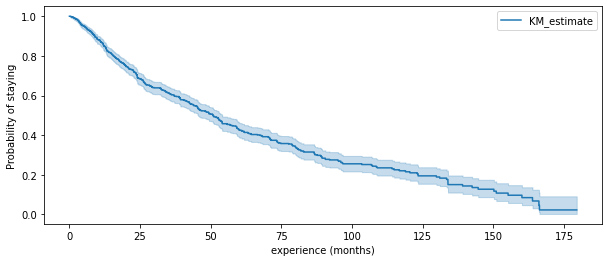

In [51]:
model.plot(figsize=(10,4))
plt.ylabel('Probability of staying')
plt.xlabel('experience (months)')